# Preparation

In [1]:

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd
data = pd.read_csv("/home/ui556004/projects/musicbert_hf/scripts/wandb_logs/nas_params.csv")
len(data)

47

In [16]:
targets = ["inversion", "quality", "primary_alteration_primary_degree_secondary_alteration_secondary_degree" , "key_pc_mode" ]

In [2]:
data.columns.values

array(['Name', 'State', 'Created', 'Group', 'seed',
       'eval/inversion_accuracy', 'train/learning_rate',
       'eval/key_pc_mode_accuracy', 'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'End Time', 'Notes', 'eval/accuracy',
       'hyperparams.inversion.linear_layers_dim', 'quality.activation_fn',
       'inversion.activation_fn',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.activation_fn',
       'key_pc_mode.activation_fn',
       'hyperparams.key_pc_mode.activation_fn',
       'hyperparams.inversion.activation_fn',
       'hyperparams.inversion.normalisation',
       'hyperparams.inver

In [3]:
from ast import literal_eval
columns = [column   for column in data.columns.values if not (column.endswith("__MIN") or column.endswith("__MAX") or column.startswith("Created") or column.startswith("End")  ) ]
data_filtered = data[columns]
activation_fn_columns = [column for column in data_filtered.columns if column.endswith("activation_fn")]
for column in activation_fn_columns:
    data_filtered[column] = data_filtered[column] .apply(literal_eval)
data_filtered.head()

/tmp/ui556004/login23-2_2794062/ipykernel_2993505/3584048438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = data_filtered[column] .apply(literal_eval)


,Name,State,Group,seed,eval/inversion_accuracy,train/learning_rate,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,freeze_layers,...,key_pc_mode.activation_fn,hyperparams.key_pc_mode.activation_fn,hyperparams.inversion.activation_fn,hyperparams.inversion.normalisation,hyperparams.inversion.pooler_dropout,hyperparams.freeze_layers,test/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy
0,trial_52,finished,attemtping_nas_1,42,0.858089,0.000006,0.837097,0.856831,0.728963,7,...,[gelu],[gelu],"[relu, relu, relu]","[""none"",""layer"",""layer""]","[0.20972893930879832,0.26506670332148374,0.462...",7,NaN,NaN,NaN,NaN
1,trial_51,finished,attemtping_nas_1,42,0.850574,0.000024,0.828272,0.843018,0.728803,8,...,"[gelu, tanh, relu, tanh, relu]","[gelu, tanh, relu, tanh, relu]",[gelu],"[""none""]",[0.17456981584416406],8,NaN,NaN,NaN,NaN
2,trial_50,finished,attemtping_nas_1,42,0.851842,0.000004,0.826634,0.854549,0.721122,6,...,"[tanh, relu, gelu, tanh, relu, relu]","[tanh, relu, gelu, tanh, relu, relu]","[relu, gelu, gelu, relu]","[""layer"",""none"",""none"",""none""]","[0.24327956956733904,0.14095775297115767,0.069...",6,NaN,NaN,NaN,NaN
3,trial_49,finished,attemtping_nas_1,42,0.822306,0.000825,0.763173,0.836552,0.681858,7,...,"[relu, tanh, gelu, gelu, tanh]","[relu, tanh, gelu, gelu, tanh]","[relu, tanh, relu, gelu, relu]","[""none"",""layer"",""layer"",""none"",""layer""]","[0.14073314332031825,0.30470599568157014,0.003...",7,NaN,NaN,NaN,NaN
4,trial_46,finished,attemtping_nas_1,42,0.864398,0.000304,0.820861,0.857745,0.738945,6,...,"[gelu, tanh, relu, tanh, relu]","[gelu, tanh, relu, tanh, relu]","[relu, relu, gelu, relu]","[""none"",""none"",""none"",""none""]","[0.4036257961169024,0.21086920778088983,0.0310...",6,NaN,NaN,NaN,NaN


In [17]:
inversion_columns = [column for column in data_filtered.columns.values if "inversion"  in column]
df_inversion = data_filtered[inversion_columns]

In [4]:
columns_acc =["Name"] + [column for column in data_filtered.columns.values if column.startswith("eval")]
data_eval = data_filtered[columns_acc]
data_eval

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
0,trial_52,0.858089,0.837097,0.856831,0.728963,0.820245
1,trial_51,0.850574,0.828272,0.843018,0.728803,0.812667
2,trial_50,0.851842,0.826634,0.854549,0.721122,0.813537
3,trial_49,0.822306,0.763173,0.836552,0.681858,0.775972
4,trial_46,0.864398,0.820861,0.857745,0.738945,0.820487
5,trial_44,0.865300,0.836752,0.864800,0.755756,0.830652
6,trial_43,0.841733,0.823776,0.854000,0.725928,0.811359
7,trial_42,0.854162,0.812904,0.853325,0.736189,0.814145
8,trial_41,0.865199,0.832602,0.859161,0.738678,0.823910
9,trial_40,0.866415,0.837870,0.860987,0.752601,0.829468


# Analysis

In [ ]:
# adding test accuracies from the paper
baseline_paper = { 
    "Name" : "baseline (paper)",
     'eval/inversion_accuracy': 0.872,
            'eval/key_pc_mode_accuracy': 0.822,
            "eval/quality_accuracy": 0.867,
            'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,

}
baseline_paper["eval/accuracy"] = float(np.mean(list(baseline_paper.values())[1:]))
baseline_paper

{'Name': 'baseline (paper)',
 'eval/inversion_accuracy': 0.872,
 'eval/key_pc_mode_accuracy': 0.822,
 'eval/quality_accuracy': 0.867,
 'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,
 'eval/accuracy': 0.83075}

In [ ]:
# adding evaluation accuracies from the recreated experiment by finetune.py
baseline_eval = { 
    "Name" : "baseline (eval)",
     'eval/inversion_accuracy': 0.8664,
            'eval/key_pc_mode_accuracy': 0.8329,
            "eval/quality_accuracy": 0.86623,
            'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.7565,

}
baseline_eval["eval/accuracy"] = float(np.mean(list(baseline_eval.values())[1:]))
baseline_eval

{'Name': 'baseline (eval)',
 'eval/inversion_accuracy': 0.8664,
 'eval/key_pc_mode_accuracy': 0.8329,
 'eval/quality_accuracy': 0.86623,
 'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.7565,
 'eval/accuracy': 0.8305075}

In [ ]:
# altogether sorted by eval accuracy
df_baseline = pd.concat([pd.DataFrame([baseline_paper], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline = pd.concat([pd.DataFrame([baseline_eval], columns=df_baseline.columns), df_baseline], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/accuracy"], ascending=False).head(10)

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
14,trial_37,0.866007,0.836128,0.867276,0.756280,0.831423
1,baseline (paper),0.872000,0.822000,0.867000,0.762000,0.830750
7,trial_44,0.865300,0.836752,0.864800,0.755756,0.830652
0,baseline (eval),0.866400,0.832900,0.866230,0.756500,0.830507
11,trial_40,0.866415,0.837870,0.860987,0.752601,0.829468
27,trial_24,0.868972,0.834920,0.863224,0.748096,0.828803
37,trial_13,0.865576,0.834458,0.862876,0.749232,0.828035
15,trial_36,0.866789,0.837876,0.862839,0.743245,0.827687
24,trial_27,0.869713,0.831433,0.862872,0.745222,0.827310
13,trial_38,0.863029,0.837641,0.863274,0.743023,0.826742


In [21]:
df_baseline.loc[df_baseline["Name"] == "trial_37"]

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
14,trial_37,0.866007,0.836128,0.867276,0.75628,0.831423


In [27]:
# 

for target in targets:
    best_acc_paper = []
    best_acc_eval = []
    acc_column = f"eval/{target}_accuracy"
    baseline_acc_paper = baseline_paper[acc_column]
    baseline_acc_eval = baseline_eval[acc_column]
    for index, row in df_baseline.iterrows():
        col_name = row["Name"]
        if (row[acc_column] >= baseline_acc_paper and "baseline" not in col_name):
            best_acc_paper.append (col_name)
        if (row[acc_column] >= baseline_acc_eval and "baseline" not in col_name):
            best_acc_eval.append (col_name)
    print(f"for {target} trials better than paper are {best_acc_paper} ")
    print(f"for {target} trials better than eval are   {best_acc_eval} ")
        #if row[acc_column] 

for inversion trials better than paper are [] 
for inversion trials better than eval are   ['trial_40', 'trial_36', 'trial_35', 'trial_27', 'trial_26', 'trial_24'] 
for quality trials better than paper are ['trial_37'] 
for quality trials better than eval are   ['trial_37'] 
for primary_alteration_primary_degree_secondary_alteration_secondary_degree trials better than paper are [] 
for primary_alteration_primary_degree_secondary_alteration_secondary_degree trials better than eval are   [] 
for key_pc_mode trials better than paper are ['trial_52', 'trial_51', 'trial_50', 'trial_44', 'trial_43', 'trial_41', 'trial_40', 'trial_39', 'trial_38', 'trial_37', 'trial_36', 'trial_35', 'trial_34', 'trial_33', 'trial_32', 'trial_31', 'trial_30', 'trial_29', 'trial_27', 'trial_26', 'trial_25', 'trial_24', 'trial_21', 'trial_19', 'trial_18', 'trial_17', 'trial_15', 'trial_13', 'trial_12', 'trial_10', 'trial_8', 'trial_7', 'trial_2', 'trial_1'] 
for key_pc_mode trials better than eval are   ['trial_

# Visualisations

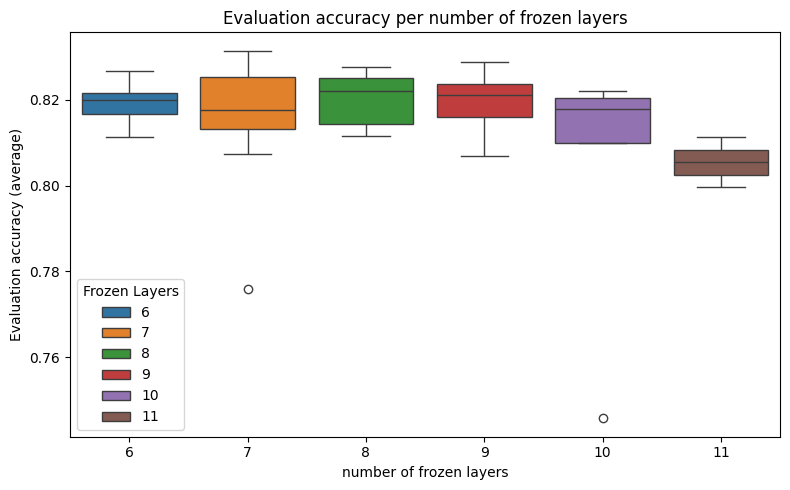

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
#data_filtered['freeze_layers'] = data_filtered['freeze_layers']  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered,  x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)
sns.boxplot(data=data_filtered, x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("number of frozen layers")
plt.ylabel("Evaluation accuracy (average)")
plt.title("Evaluation accuracy per number of frozen layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.savefig("figures/frozen_layers_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

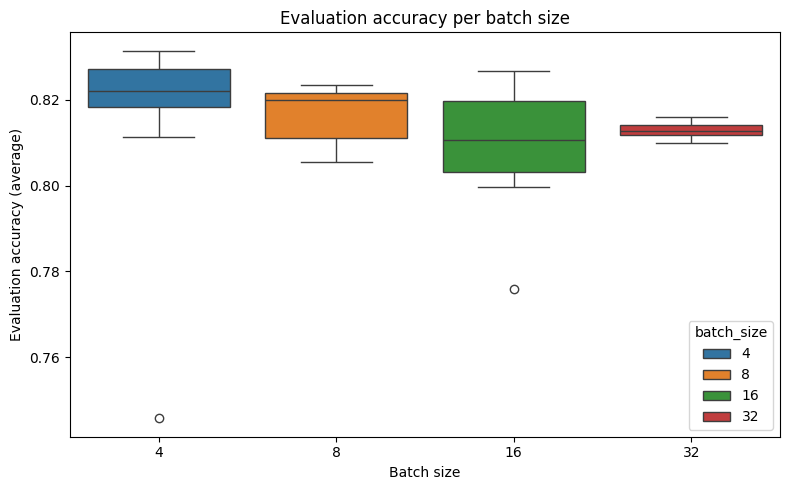

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
#data_filtered['batch_size'] = data_filtered['batch_size'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)
sns.boxplot(data=data_filtered,x='batch_size', y='eval/accuracy', hue='batch_size', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Evaluation accuracy (average)")
plt.title("Evaluation accuracy per batch size")
#plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.savefig("figures/batch_size_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

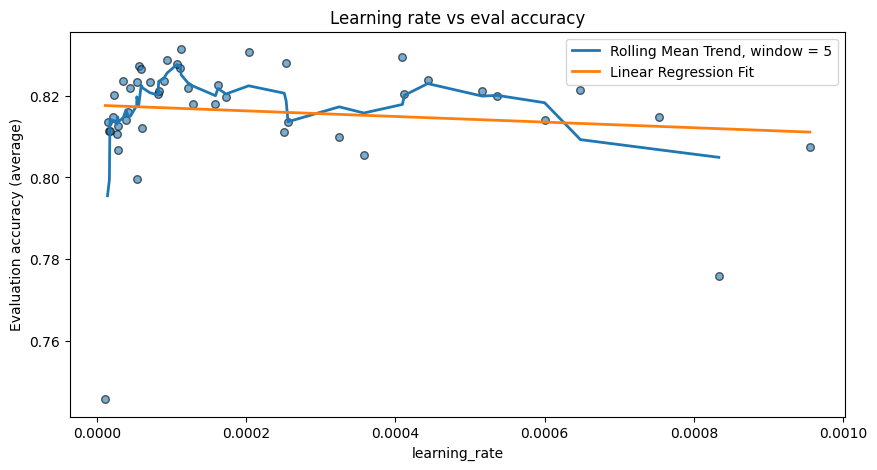

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume df is already loaded with columns "dropout_top" and "eval/accuracy"
x = data_filtered["learning_rate"].values
y = data_filtered["eval/accuracy"].values

# Fit linear regression
X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Prepare data for plotting
order = np.argsort(x)
x_sorted = x[order]
y_pred_sorted = model.predict(x_sorted.reshape(-1, 1))

# Compute rolling mean for trend line
window = max(8, len(x) // 20)
y_smooth = pd.Series(y[order]).rolling(window= 5, min_periods=4, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha=0.6, edgecolors='k', s=30)
ax.plot(x_sorted, y_smooth, lw=2, label='Rolling Mean Trend, window = 5')
ax.plot(x_sorted, y_pred_sorted, lw=2, label='Linear Regression Fit')

ax.set_xlabel("learning_rate")
ax.set_ylabel("Evaluation accuracy (average)")
ax.set_title("Learning rate vs eval accuracy")
ax.legend()
plt.savefig("figures/learning_rate_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [28]:
data_filtered.columns.values

array(['Name', 'State', 'Group', 'seed', 'eval/inversion_accuracy',
       'train/learning_rate', 'eval/key_pc_mode_accuracy',
       'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'Notes', 'eval/accuracy',
       'hyperparams.inversion.linear_layers_dim',
       'hyperparams.key_pc_mode.activation_fn',
       'hyperparams.inversion.activation_fn',
       'hyperparams.inversion.normalisation',
       'hyperparams.inversion.pooler_dropout',
       'hyperparams.freeze_layers'], dtype=object)

/tmp/ui556004/login23-1_3311149/ipykernel_3698814/744711177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order
/tmp/ui556004/login23-1_3311149/ipykernel_3698814/744711177.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


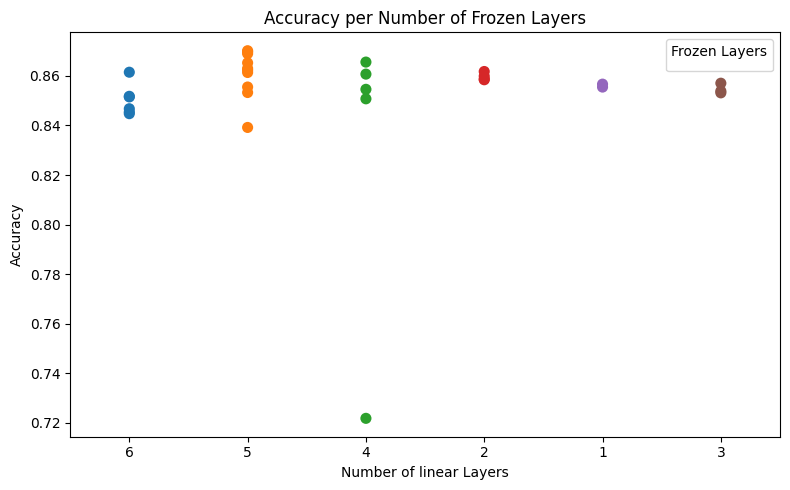

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def display_four(data_filtered, parameter, targets= None, mode = False, box = False, full_name = None):

    df = data_filtered.copy()

    def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
    
    suffix = ".mode" if mode else ""
    # Define targets with possible column-name variants
    targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"primary_alteration_primary_degree_secondary_alteration_secondary_degree.{parameter}{suffix}"],
        ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
    fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
    axes = axes.ravel()

    for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
        layer_col = pick_col(df, layer_cands)
        acc_col   = pick_col(df, acc_cands)
        #ax.set_ylim(0.7, 0.9)

        # Make layer categorical (ordered by the numeric value)
        # Fall back to lexicographic if casting fails
        try:
            order = sorted(df[layer_col].dropna().astype(int).astype(str).unique(), key=lambda s: int(s))
        except Exception:
            order = sorted(df[layer_col].dropna().astype(str).unique())

        plot_df = df.copy()
        plot_df[layer_col] = plot_df[layer_col].astype(str)
        # if mode:
        #     order = sorted(plot_df[layer_col].dropna().astype(str).unique())
        # Jittered points + per-layer mean trend
        if box:
            sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        else:
            sns.stripplot(
                data=plot_df, x=layer_col, y=acc_col,
                order=order, jitter=True, size=5, ax=ax
            )

        # Overlay means per number of layers
            means = (plot_df.groupby(layer_col, observed=True)[acc_col]
                            .mean()
                            .reindex(order))
            ax.plot(order, means.values, marker='o')

        ax.set_xlabel(f"{parameter}")
        ax.set_ylabel(f"Evaluation accuracy")
        ax.set_title(f" {name}")
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)

    fig.suptitle(f"Accuracy per {full_name} (by target)", y=0.98)
    plt.tight_layout()
    suffix = "with_mode" if mode else ""
    plt.savefig(f"figures/{parameter}_{suffix}_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return targets

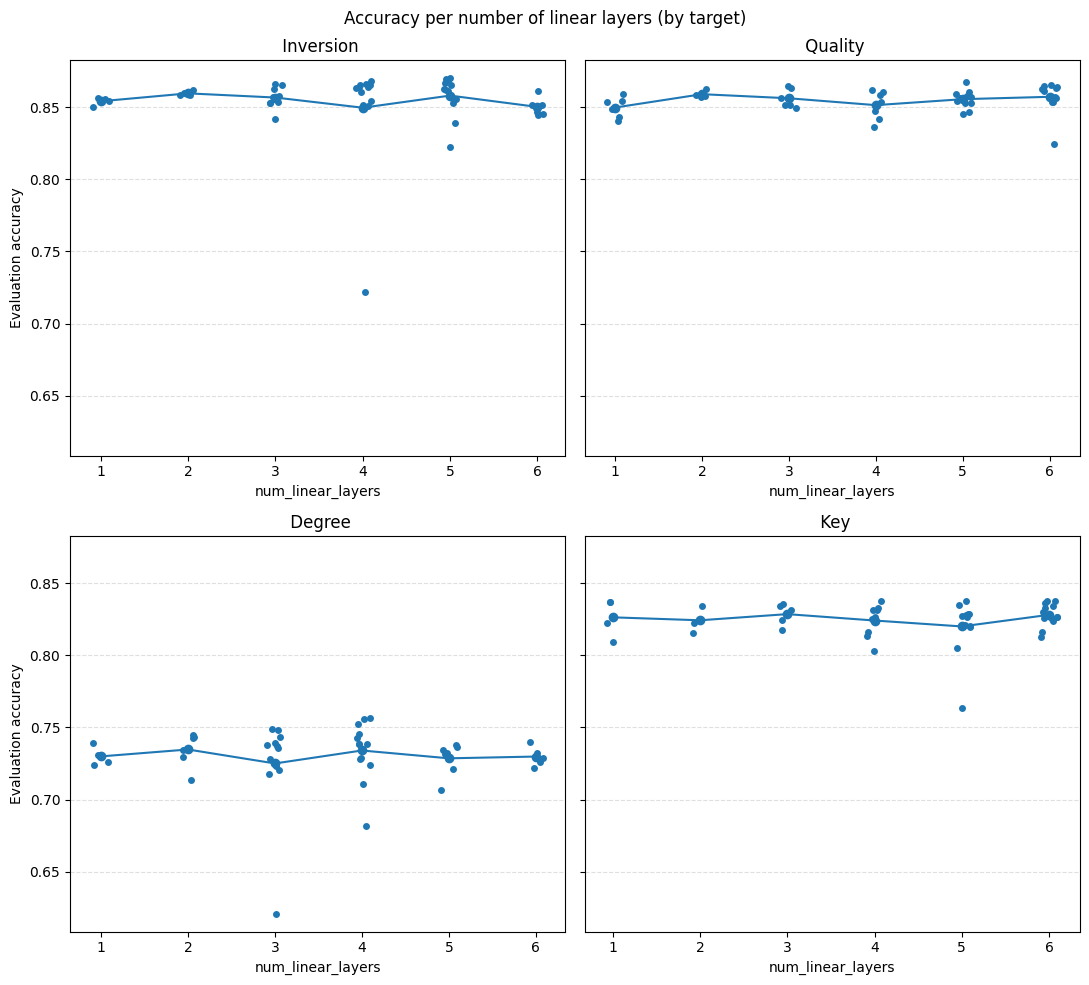

In [79]:
targets =display_four(data_filtered, parameter= "num_linear_layers", full_name = "number of linear layers", box = False)

In [31]:
import statistics 
def get_mode(parameter, target, data):
    statistics.mode(data_filtered[f"{target}.{parameter}"][0])
    data[f"{target}.{parameter}.mode"] =  data_filtered[f"{target}.{parameter}"].apply(lambda x : statistics.mode(x))
    return data

In [29]:
def create_df_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) == 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: v[0]
    )
    return df_target

In [32]:
def create_df_activation(df, target):
    # Check if all activations are the same
    def check_unique(v):
        unique = set(v)
        return list(unique)[0] if len(unique) == 1 else "mix"

    df_target = df[[f"{target}.activation_fn", f"eval/{target}_accuracy"]].copy()
    df_target[f"{target}.activation_fn_unique"] = df_target[f"{target}.activation_fn"].apply(check_unique)
    return df_target

In [33]:
def create_df_not_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) > 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: "mix"
    )
    return df_target

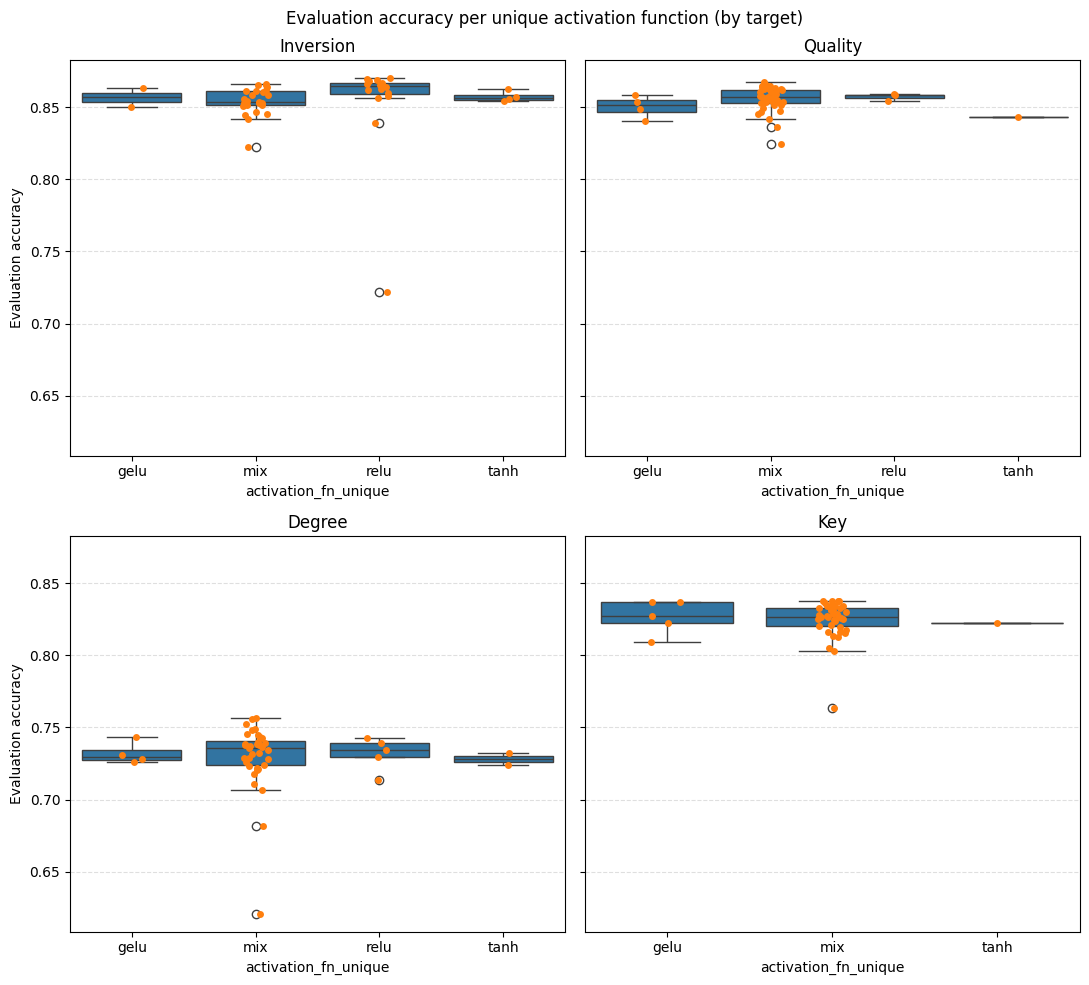

In [97]:
df_activation_array = []
df_not_unique_activatin_array = []
targets = ["inversion", "quality", "primary_alteration_primary_degree_secondary_alteration_secondary_degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_activation (data_filtered,target)
    df_activation_array.append(df_target)
parameter = "activation_fn_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"primary_alteration_primary_degree_secondary_alteration_secondary_degree.{parameter}{suffix}"],
        ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)
    order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    #print(order)
    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Evaluation accuracy")
    ax.set_title(f"{name}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Evaluation accuracy per unique activation function (by target)", y=0.98)
plt.tight_layout()
plt.savefig(f"figures/unique_activation_function_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x = "activation_fn_unique"
y = "eval/quality_accuracy"
# Ensure freeze_layers is treated as categorical
#df_target[x] = df_target[x].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)
sns.boxplot(data=df_target,x=x, y=y, hue=x, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("Accuracy per batch size")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

In [34]:
targets = ["inversion", "quality", "key_pc_mode","primary_alteration_primary_degree_secondary_alteration_secondary_degree" ]
parameter = "activation_fn"
data_filtered_copy = data_filtered.copy()
for target in targets:
    data_filtered_copy=  get_mode(parameter, target, data_filtered_copy)
data_filtered_copy.head()

,Name,State,Group,seed,eval/inversion_accuracy,train/learning_rate,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,freeze_layers,...,hyperparams.inversion.pooler_dropout,hyperparams.freeze_layers,test/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy,inversion.activation_fn.mode,quality.activation_fn.mode,key_pc_mode.activation_fn.mode,primary_alteration_primary_degree_secondary_alteration_secondary_degree.activation_fn.mode
0,trial_52,finished,attemtping_nas_1,42,0.858089,0.000006,0.837097,0.856831,0.728963,7,...,"[0.20972893930879832,0.26506670332148374,0.462...",7,NaN,NaN,NaN,NaN,relu,gelu,gelu,tanh
1,trial_51,finished,attemtping_nas_1,42,0.850574,0.000024,0.828272,0.843018,0.728803,8,...,[0.17456981584416406],8,NaN,NaN,NaN,NaN,gelu,tanh,tanh,relu
2,trial_50,finished,attemtping_nas_1,42,0.851842,0.000004,0.826634,0.854549,0.721122,6,...,"[0.24327956956733904,0.14095775297115767,0.069...",6,NaN,NaN,NaN,NaN,relu,tanh,relu,relu
3,trial_49,finished,attemtping_nas_1,42,0.822306,0.000825,0.763173,0.836552,0.681858,7,...,"[0.14073314332031825,0.30470599568157014,0.003...",7,NaN,NaN,NaN,NaN,relu,gelu,tanh,tanh
4,trial_46,finished,attemtping_nas_1,42,0.864398,0.000304,0.820861,0.857745,0.738945,6,...,"[0.4036257961169024,0.21086920778088983,0.0310...",6,NaN,NaN,NaN,NaN,relu,tanh,tanh,relu


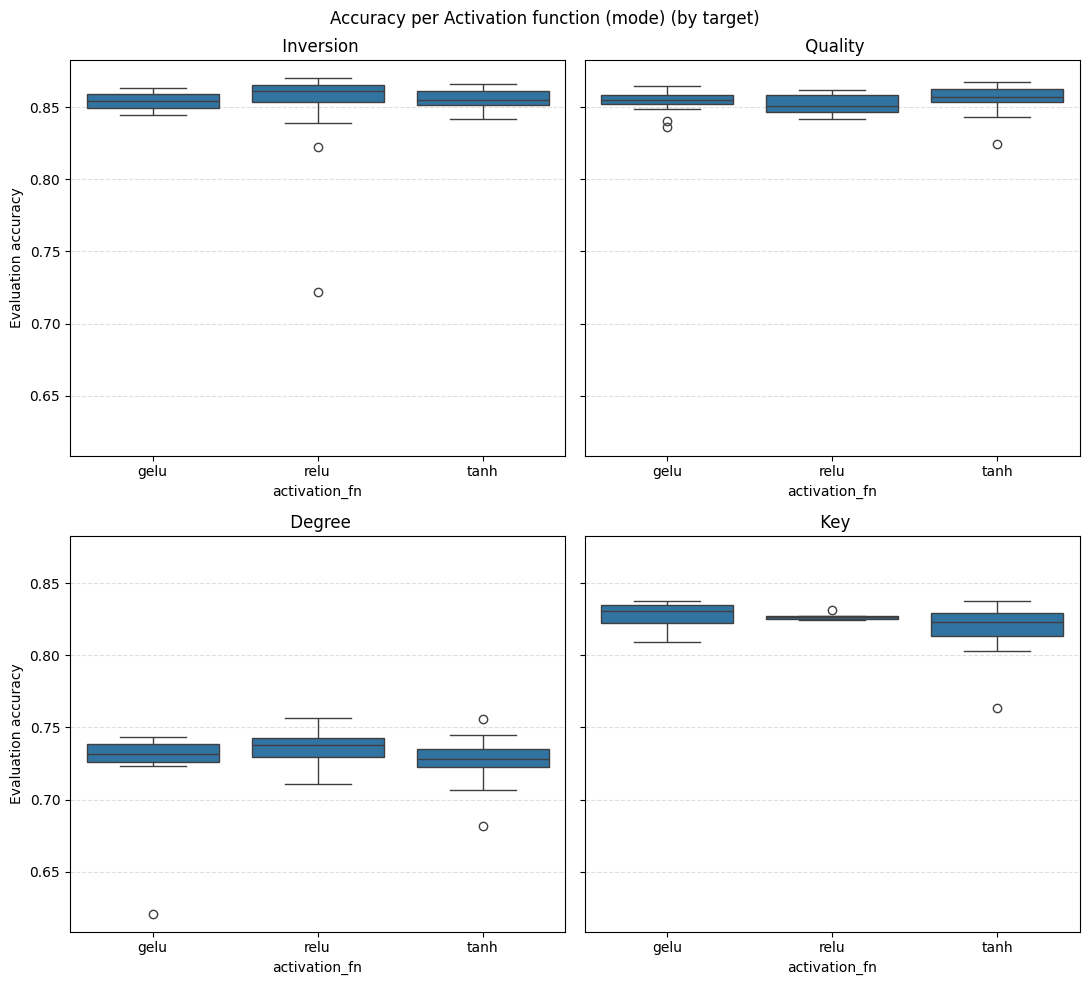

In [41]:
targets =display_four(data_filtered_copy, parameter= "activation_fn", mode = True, box = True, full_name="Activation function (mode)")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.activatin_fn'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_3311149/ipykernel_3698814/3230526467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))
/tmp/ui556004/login23-1_3311149/ipykernel_3698814/3230526467.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


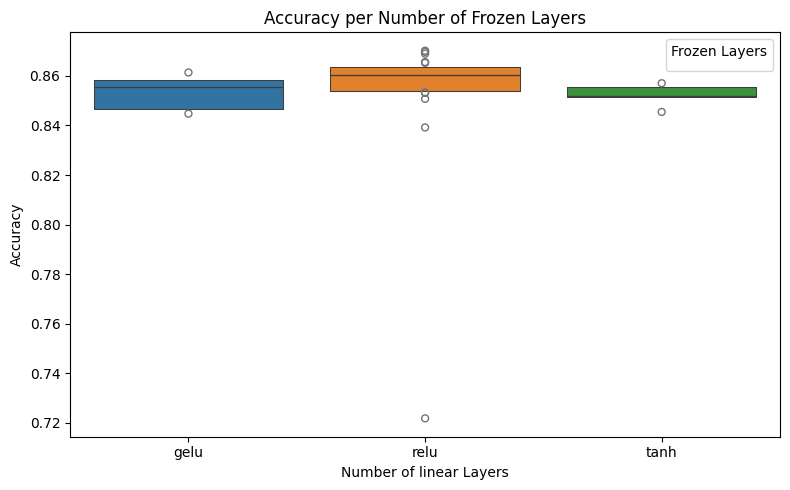

In [18]:
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
statistics.mode(data_filtered['hyperparams.inversion.activation_fn'][0])
data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))


# Ensure freeze_layers is treated as categorica

# Create the plot
plt.figure(figsize=(8, 5))
sns.boxenplot(data=data_filtered, x="inverision.activation_fn.mode", y='eval/inversion_accuracy', hue="inverision.activation_fn.mode",  palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()